### # 【AIコース】大課題 ボストン住宅価格 線形回帰

http://xica.net/magellan/marketing-idea/stats/about-coefficient-of-determination/

# 課題 ボストン住宅価格 線形回帰
## 課題要件まとめ
- 線形回帰とは何か
- データを取得する
- 取得データをDataFrameにする
- 説明変数を'LSTAT'のみにする
- 単回帰と重回帰についての違いを記述せよ
- テストデータに分割する
- 学習
- 決定係数
- 決定係数とは何か記述せよ
- 決定係数をいかなる場合も信じても良いか記述せよ
- 2,3,4次式の回帰
- 次数が大きくなるとどうなるか記述せよ
- 重回帰
- 重回帰について記述せよ

### 線形回帰とは何か
- 線形回帰とは何か。
- 具体的に言うと？
- 分類と何か違うのか。

答え : 

線形回帰とは，回帰分析の手法の１つである。線形とは，１次関数のことを言う。

例えば，２次元データについて比較的相関が見られる場合，直線（１次関数）を想定し，データのY座標と直線とのオフセットを最小にするような直線を見出す。

具体的に言えば，特徴量（説明変数 x）と連続値の応答（目的変数 y）において，線形モデルの方程式

y = ax + b

を求める。オフセットの評価は二乗和が使われることが多い。また，特徴量が複数あるときは，重回帰という。

機械学習の分類とは，属性とその値の組によって表現されたデータをいくつかのクラス分けすることである。

### 単回帰と重回帰についての違いを記述せよ

答え : 

単回帰とは，説明変数が１つであり，つまり，２次元データを扱う。線形回帰は直線となる。

重回帰とは，説明変数が複数である。例えば，３次元データの場合，説明変数は，２個であり，線形回帰は平面となる。

### 決定係数とは何か記述せよ
- 決定係数とは何か
- もっとも説明変数が、目的変数を説明できる場合、決定係数は何になるか
- どのように求めることができるか

答え :

決定係数とは，標準化された平均二乗誤差と考えることができる。平均二乗誤差とは，オフセット（誤差）の平方和であり，それを分散で除したものである。

定義から，最大値は，1.0になる。このとき，誤差は0であり，説明変数が目的変数を説明できている状態である。

R^2 = 1 - SSE / SST （SSE ; 誤差平方和，SST ; 分散） 

### 決定係数をいかなる場合も信じても良いか記述せよ

答え :

まず最初にサンプル数とサンプリングの問題があります。

極端な例を示すと，サンプル数がN個であれば，N-1次の多項式の回帰で誤差が0になります。

大きな母数の場合，一定以上のサンプル数が必要であり，また，サンプリングも完全なアトランダムでなければなりません。これは，伝統的な統計学が示しています。

決定係数は，あくまでも，サンプルの評価であり，上の理由から，たまたま良かった場合も無いわけではない。

次に，決定係数の数値の解釈の問題があります。

例えば，0.50は，的中率が50%ということではなく，説明変数が目的変数を50%説明できているということである。

回帰の良否を判断する材料として残差プロットも有効である（この巻末に描画してある）。

### 次数が大きくなるとどうなるか記述せよ
- 説明変数をxとして、次数を増やしていくとどのように数式が変化していくか記述せよ（1次式 ax + b）
- 次数を増やすとどのようなメリットが考えられるか
- 次数を増やすとどのようなデメリットが考えられるか

答え : 

２次式 ; ax^2 + bx + c

３次式 ; ax^3 + bx^2 + cx + d

次数を増やした場合のメリットは，誤差が小さくなっていく。つまり，説明変数が目的変数を良く捕捉できる。

次数を増やした場合のデメリットは，過学習になりやすく，新しいデータを説明できなくなる可能性が高くなっていく。

### 重回帰について記述せよ
- 説明変数を増やすことでどのようなメリットがあるか
- 説明変数を増やすことでどのようなデメリットがあるか

説明変数を増やした場合のメリットは，説明変数の選び方にもよるが，予測が正確になっていく。

説明変数を増やした場合のデメリットは，過学習になりやすい。また，疑似相関も見つけにくい。説明変数どうしが相関が高ければ，予測が正確であるかのように錯覚する可能性もなくはない。また，因果関係の説明も困難になりやすくなる。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from scipy.stats import zscore
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

- CRIM ; 人口 1 人当たりの犯罪発生数
- ZN ; 25,000 平方フィート以上の住居区画の占める割合 
- INDUS ; 小売業以外の商業が占める面積の割合 
- CHAS ; チャールズ川によるダミー変数 (1: 川の周辺, 0: それ以外)  
- NOX ; NOx の濃度 
- RM ; 住居の平均部屋数 
- AGE ; 1940 年より前に建てられた物件の割合 
- DIS ; 5つのボストン市の雇用施設からの距離 (重み付け済) 
- RAD ; 環状高速道路へのアクセスしやすさ 
- TAX ; 10,000 ドルあたりの不動産税率の総計 
- PTRATIO ; 町毎の児童と教師の比率 
- B ; 町毎の黒人 (Bk) の比率を次の式で表したもの。 1000(Bk ? 0.63)^2 
- LSTAT ; 給与の低い職業に従事する人口の割合 (%) 
- MEDV ; 住宅価格の中央値（単位 1,000ドル）

In [2]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
X = X['LSTAT']
X.head()

0    4.98
1    9.14
2    4.03
3    2.94
4    5.33
Name: LSTAT, dtype: float64

In [4]:
y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

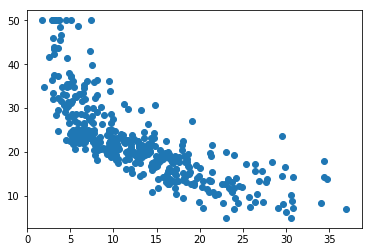

(404,)
(404, 1)
(102,)
(102, 1)


In [6]:
plt.scatter(X_train, y_train)
plt.show()
print(X_train.shape) # 1次元
print(y_train.shape) # 縦ベクトル
print(X_test.shape) # 1次元
print(y_test.shape) # 縦ベクトル

In [7]:
lin_1d = LinearRegression()
lin_1d.fit(X_train[:,None], y_train) # 引数は縦ベクトル

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

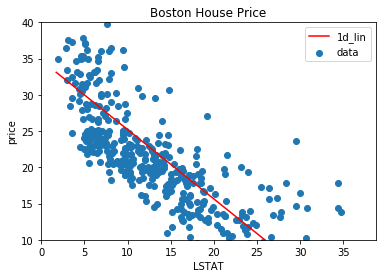

In [8]:
n = np.linspace(np.min(X_train),np.max(X_train), 1000)
y_1d_fit=lin_1d.predict(n[:,np.newaxis]) # 引数は縦ベクトル
# y_1d_fit=lin_1d.predict(n[:,None]) # こちらでもよい
plt.title("Boston House Price")
plt.scatter(X_train, y_train,label='data')
plt.plot(n,y_1d_fit,'r',label='1d_lin') # y_1d_fitの右辺を書いてもよい
plt.ylim(10,40)
plt.xlabel("LSTAT")
plt.ylabel("price") # 'MEDV'のこと
plt.legend()
plt.show()

In [9]:
# score_1d = lin_1d.score(X_test.values.reshape(-1,1), y_test) # 引数は縦ベクトル
score_1d = lin_1d.score(X_test[:,None], y_test) # 引数は縦ベクトル
# print("一次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_1d))
print("一次式における'LSTAT'の住宅価格への決定係数は{:.2f}".format(score_1d))

一次式における'LSTAT'の住宅価格への決定係数は0.43


In [10]:
lin_2d = LinearRegression()
lin_3d = LinearRegression()
lin_4d = LinearRegression()

degree_2 = PolynomialFeatures(degree=2)
degree_3 = PolynomialFeatures(degree=3)
degree_4 = PolynomialFeatures(degree=4)

x_train_2 = degree_2.fit_transform(X_train[:,None])
x_train_3 = degree_3.fit_transform(X_train[:,None])
x_train_4 = degree_4.fit_transform(X_train[:,None])

lin_2d.fit(x_train_2, y_train)
lin_3d.fit(x_train_3, y_train)
lin_4d.fit(x_train_4, y_train)

x_test_2 = degree_2.fit_transform(X_test[:,None])
x_test_3 = degree_3.fit_transform(X_test[:,None])
x_test_4 = degree_4.fit_transform(X_test[:,None])

score_2d = lin_2d.score(x_test_2, y_test)
score_3d = lin_3d.score(x_test_3, y_test)
score_4d = lin_4d.score(x_test_4, y_test)

print("二次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_2d))
print("三次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_3d))
print("四次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_4d))

二次式における'LSTAT'の住宅価格への決定係数は0.52
三次式における'LSTAT'の住宅価格への決定係数は0.54
四次式における'LSTAT'の住宅価格への決定係数は0.57


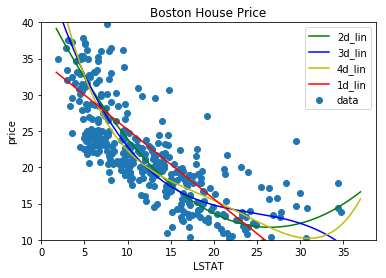

In [11]:
n = np.linspace(np.min(X_train),np.max(X_train), 1000)
y_2d_fit=lin_2d.predict(degree_2.fit_transform(n[:,np.newaxis]))
y_3d_fit=lin_3d.predict(degree_3.fit_transform(n[:,np.newaxis]))
y_4d_fit=lin_4d.predict(degree_4.fit_transform(n[:,np.newaxis]))
y_1d_fit=lin_1d.predict(n[:,np.newaxis])

plt.title("Boston House Price")
plt.scatter(X_train,y_train,label='data')
plt.plot(n,y_2d_fit,'g',label='2d_lin')
plt.plot(n,y_3d_fit,'b',label='3d_lin')
plt.plot(n,y_4d_fit,'y',label='4d_lin')
plt.plot(n,y_1d_fit,'r',label='1d_lin')
plt.ylim(10,40) # グラフを見やすくするためにｙ軸のプロット範囲を絞ります。
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.show()

In [12]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target)

In [13]:
# メジアンMEDVカラムを表示する方法（boston.data, boston.targetを合体）
boston2 = pd.DataFrame(
    np.column_stack([boston.data, boston.target]), 
    columns=np.r_[boston.feature_names, ['MEDV']])
boston2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


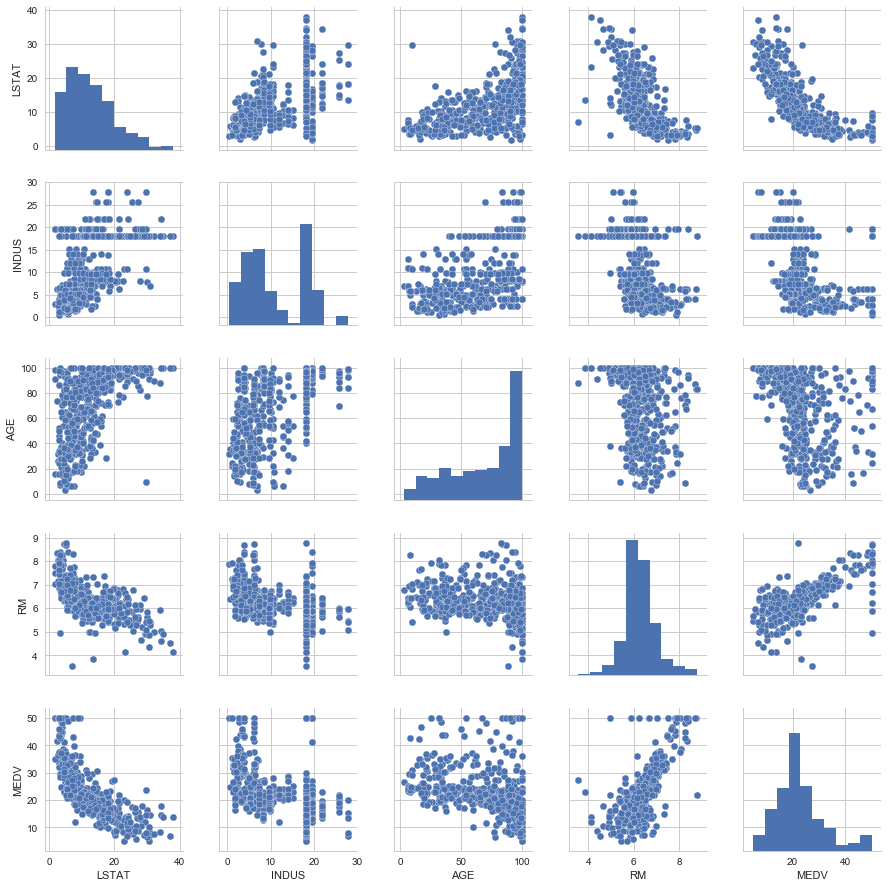

In [14]:
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'AGE', 'RM', 'MEDV']

sns.pairplot(boston2[cols], size=2.5)
plt.tight_layout()
# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
lin_1d_2 = LinearRegression()
# x2_train = X_train.loc[:, ['LSTAT','RM']].as_matrix()
x2_train = X_train.loc[:, ['LSTAT','RM','CRIM','AGE']].as_matrix()
lin_1d_2.fit(x2_train, y_train)
print(x2_train .shape)

(404, 4)


In [17]:
# x2_test = X_test.loc[:, ['LSTAT','RM']].as_matrix()
x2_test = X_test.loc[:, ['LSTAT','RM','CRIM','AGE']].as_matrix()
y_train_pred = lin_1d_2.predict(x2_train)
y_test_pred = lin_1d_2.predict(x2_test)

print('決定係数 train: {:.3f}, test: {:.3f}'.format(r2_score(y_train, y_train_pred),
                                                    r2_score(y_test, y_test_pred)))
print('決定係数 train: {:.3f}, test: {:.3f}'.format(lin_1d_2.score(x2_train, y_train),
                                                    lin_1d_2.score(x2_test, y_test)))

決定係数 train: 0.673, test: 0.527
決定係数 train: 0.673, test: 0.527


In [18]:
lin_1d_2 = LinearRegression()
x2_train = X_train.loc[:,:].as_matrix()
lin_1d_2.fit(x2_train, y_train)
print(x2_train .shape)

(404, 13)


In [19]:
x2_test = X_test.loc[:,:].as_matrix()
y_train_pred = lin_1d_2.predict(x2_train)
y_test_pred = lin_1d_2.predict(x2_test)

print('決定係数 train: {:.3f}, test: {:.3f}'.format(r2_score(y_train, y_train_pred),
                                                    r2_score(y_test, y_test_pred)))
print('決定係数 train: {:.3f}, test: {:.3f}'.format(lin_1d_2.score(x2_train, y_train),
                                                    lin_1d_2.score(x2_test, y_test)))

決定係数 train: 0.773, test: 0.589
決定係数 train: 0.773, test: 0.589


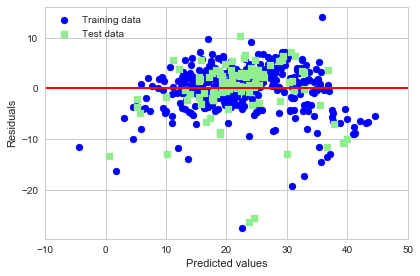

In [20]:
# # 残差プロット（residual plot）
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()